<a href="https://colab.research.google.com/github/kotsun32/Dog_Detection_DL/blob/main/NN_Dog_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
from IPython.display import Image
import os
from matplotlib.pyplot import imread

In [ ]:
print("GPU", "available(YESSS!)" if tf.config.list_physical_devices("GPU") else "Not available")

GPU available(YESSS!)


In [ ]:
!unzip "/content/drive/MyDrive/Dog_Detection/dog-breed-identification (1).zip" -d "/content/drive/MyDrive/Dog_Detection"

unzip:  cannot find or open /content/drive/MyDrive/Dog_Detection/dog-breed-identification (1).zip, /content/drive/MyDrive/Dog_Detection/dog-breed-identification (1).zip.zip or /content/drive/MyDrive/Dog_Detection/dog-breed-identification (1).zip.ZIP.


In [ ]:
labels_csv = pd.read_csv("/content/drive/MyDrive/DogVision/dog-breed-identification/labels.csv")

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [ ]:
labels_csv.breed.value_counts()


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [ ]:
labels = labels_csv.breed

In [ ]:
filenames = ["/content/drive/MyDrive/Dog_Detection/train/" + fname + ".jpg" for fname in labels_csv['id']]

In [ ]:
filenames[:5]

['/content/drive/MyDrive/Dog_Detection/train000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog_Detection/train001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog_Detection/train001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog_Detection/train00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog_Detection/train0021f9ceb3235effd7fcde7f7538ed62.jpg']

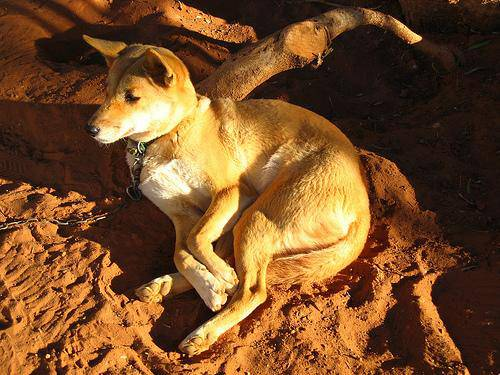

In [ ]:
Image(filenames[1])


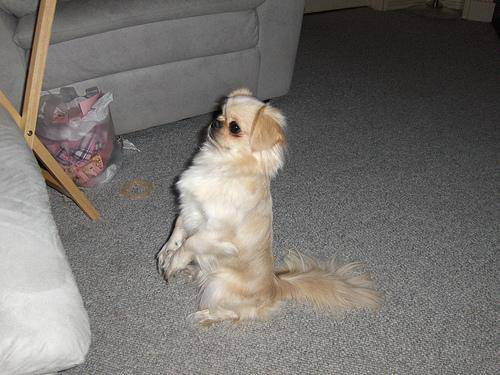

In [ ]:
Image(filenames[2])


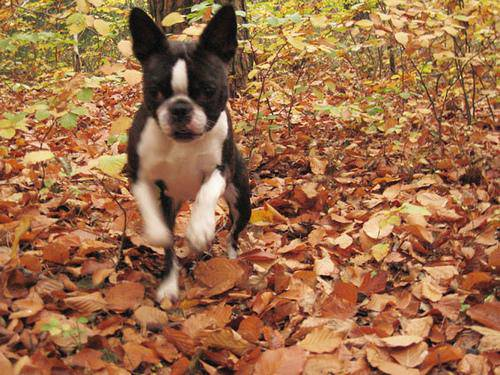

In [ ]:
Image("/content/drive/MyDrive/Dog_Detection/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
labels = np.array(labels)
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
#np array of each category 
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
X = filenames
y = boolean_labels


In [ ]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000}

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val, y_train,y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2, random_state=42)

In [ ]:
len(X_val),len(X_train)

(200, 800)

In [ ]:
image = imread(filenames[42])
image.shape

In [ ]:
tf.constant(image)

In [ ]:
def process_image(image_path):
  #Read image file 
  image = tf.io.read_file(image_path)
  #Turns jpeg to numerical tensor w/ 3 colors 
  image = tf.image.decode_jpeg(image,channels=3)
  #Coverts color values from 0-255 to 0-1 Normalizing data 
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize image to (224,224)
  image = tf.image.resize(image, size = [224, 224])

  return image

In [ ]:
# return tuple for (image, label)
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image,label

In [ ]:
#Might elimate this 
# define batch size to 32
BATCH_SIZE = 32
def create_data_batches(X,y=None, batch_size = BATCH_SIZE,valid_data=False,test_data =False):
  """
  Creates batches from X,y 
  Shuffles training data but doesnt shuffle validation data 
  accepts test data as input which would have 0 labels hense y is set at none
  """
  if test_data:
    print("Creating test batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("create training batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    # shuffling data 
    # shuffling smart first because easier to shuffle names than the full images
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [ ]:
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

create training batches
Creating validation batches


In [ ]:
INPUT_SHAPE = [None, 224, 224, 3]

OUTPUT_SHAPE = len(unique_breeds)

In [ ]:
model_NN = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224,3)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(OUTPUT_SHAPE, activation="softmax") # output shape is 10, activation is softmax
])

model_NN.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_NN = model_NN.fit(train_data, # use augmented data
                          epochs=5,
                          #steps_per_epoch=len(train_data),
                          validation_data=val_data)
                          #alidation_steps=len(train_data))

Epoch 1/5
25/25 [==============================] - 5s 191ms/step - loss: 6.0102 - accuracy: 0.0037 - val_loss: 4.7882 - val_accuracy: 0.0000e+00
Epoch 2/5
25/25 [==============================] - 3s 117ms/step - loss: 4.7897 - accuracy: 0.0150 - val_loss: 4.7884 - val_accuracy: 0.0000e+00
Epoch 3/5
25/25 [==============================] - 3s 119ms/step - loss: 4.7830 - accuracy: 0.0162 - val_loss: 4.7889 - val_accuracy: 0.0000e+00
Epoch 4/5
25/25 [==============================] - 3s 121ms/step - loss: 4.7810 - accuracy: 0.0162 - val_loss: 4.7894 - val_accuracy: 0.0000e+00
Epoch 5/5
25/25 [==============================] - 3s 120ms/step - loss: 4.7791 - accuracy: 0.0162 - val_loss: 4.7897 - val_accuracy: 0.0000e+00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_CNN = tf.keras.Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(120, activation='softmax') ])
 
model_CNN.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_CNN = model_CNN.fit(train_data, # use augmented data
                          epochs=15,
                          #steps_per_epoch=len(train_data)/25,
                          validation_data=val_data)
                          #validation_steps=len(train_data)/25)

Epoch 1/15
25/25 [==============================] - 6s 208ms/step - loss: 4.8565 - accuracy: 0.0063 - val_loss: 4.7909 - val_accuracy: 0.0100
Epoch 2/15
25/25 [==============================] - 3s 130ms/step - loss: 4.1886 - accuracy: 0.2225 - val_loss: 4.9064 - val_accuracy: 0.0250
Epoch 3/15
25/25 [==============================] - 3s 130ms/step - loss: 2.7560 - accuracy: 0.5863 - val_loss: 5.8028 - val_accuracy: 0.0350
Epoch 4/15
25/25 [==============================] - 3s 131ms/step - loss: 1.1594 - accuracy: 0.8363 - val_loss: 7.0038 - val_accuracy: 0.0300
Epoch 5/15
25/25 [==============================] - 3s 131ms/step - loss: 0.3968 - accuracy: 0.9563 - val_loss: 8.1864 - val_accuracy: 0.0250
Epoch 6/15
25/25 [==============================] - 3s 129ms/step - loss: 0.1160 - accuracy: 0.9900 - val_loss: 9.0959 - val_accuracy: 0.0200
Epoch 7/15
25/25 [==============================] - 3s 130ms/step - loss: 0.0559 - accuracy: 0.9975 - val_loss: 9.3756 - val_accuracy: 0.0450
Epoch 

In [ ]:
model_NN_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224,3)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(OUTPUT_SHAPE, activation="softmax") # output shape is 10, activation is softmax
])

model_NN_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_NN_2 = model_NN_2.fit(train_data, # use augmented data
                          epochs=25,
                          #steps_per_epoch=len(train_data),
                          validation_data=val_data)
                          #alidation_steps=len(train_data))

Epoch 1/25
25/25 [==============================] - 6s 198ms/step - loss: 11.2623 - accuracy: 0.0100 - val_loss: 4.8478 - val_accuracy: 0.0200
Epoch 2/25
25/25 [==============================] - 3s 122ms/step - loss: 4.7974 - accuracy: 0.0050 - val_loss: 4.7883 - val_accuracy: 0.0150
Epoch 3/25
25/25 [==============================] - 3s 124ms/step - loss: 4.7836 - accuracy: 0.0137 - val_loss: 4.7890 - val_accuracy: 0.0200
Epoch 4/25
25/25 [==============================] - 3s 124ms/step - loss: 4.7810 - accuracy: 0.0150 - val_loss: 4.7899 - val_accuracy: 0.0200
Epoch 5/25
25/25 [==============================] - 3s 123ms/step - loss: 4.7774 - accuracy: 0.0150 - val_loss: 4.7913 - val_accuracy: 0.0200
Epoch 6/25
25/25 [==============================] - 3s 123ms/step - loss: 4.7726 - accuracy: 0.0150 - val_loss: 4.7942 - val_accuracy: 0.0200
Epoch 7/25
25/25 [==============================] - 3s 120ms/step - loss: 4.7654 - accuracy: 0.0150 - val_loss: 4.7989 - val_accuracy: 0.0200
Epoch

KeyboardInterrupt: ignored

In [ ]:
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
INPUT_SHAPE = (None,224,224,3)
OUTPUT_SHAPE= OUTPUT_SHAPE = len(unique_breeds)
from sklearn.utils.extmath import softmax
# setting it equal to value in params makes it a default. ah
def create_model(input_shape= INPUT_SHAPE,output_shape = OUTPUT_SHAPE,model_url = MODEL_URL):
  print("building model with: ", MODEL_URL)
  #print("hi")
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation ="softmax") #(layer 2 output)
    ])
  #print("hello")
  #compile model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  model.build(INPUT_SHAPE)
  return model

In [ ]:
%load_ext tensorboard

import datetime 
#funtion to create tensorboard callback
def create_tensorboard_callback():
  logdir = os.path.join("/content/drive/MyDrive/Dog_Detection/logs",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

def train_model():
  #create model
  model = create_model()

  #create new Tensorboard sessions everytime model is trained
  tensorboard = create_tensorboard_callback()

  #fit model to data passing through callbacks we created
  model.fit(x= train_data, epochs = 50,validation_data=val_data,
            validation_freq=1, callbacks=[tensorboard, early_stopping])
  return model

In [ ]:
model = train_model()

building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/50
25/25 [==============================] - 111s 4s/step - loss: 4.5951 - accuracy: 0.0925 - val_loss: 3.5249 - val_accuracy: 0.2700
Epoch 2/50
25/25 [==============================] - 4s 150ms/step - loss: 1.6468 - accuracy: 0.6825 - val_loss: 2.2314 - val_accuracy: 0.4950
Epoch 3/50
25/25 [==============================] - 3s 124ms/step - loss: 0.5680 - accuracy: 0.9425 - val_loss: 1.7519 - val_accuracy: 0.5350
Epoch 4/50
25/25 [==============================] - 3s 123ms/step - loss: 0.2499 - accuracy: 0.9912 - val_loss: 1.5498 - val_accuracy: 0.6100
Epoch 5/50
25/25 [==============================] - 3s 125ms/step - loss: 0.1441 - accuracy: 0.9987 - val_loss: 1.4605 - val_accuracy: 0.6250
Epoch 6/50
25/25 [==============================] - 4s 151ms/step - loss: 0.0994 - accuracy: 1.0000 - val_loss: 1.4174 - val_accuracy: 0.6350
Epoch 7/50
25/25 [==============================] - 4s 